In [2]:
import gensim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
%pylab inline

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [19]:
documents=gensim.models.doc2vec.TaggedLineDocument('Data/p_comments.txt')
f = open('Data/p_comments.txt', 'r')
x = f.readlines()
f.close()

In [4]:
model = gensim.models.Doc2Vec(documents, size=100, workers=4, min_count=5)  # use fixed learning rate
#model.build_vocab(documents)
#for epoch in range(20):
#    model.train(documents)
    #model.alpha -= 0.001  # decrease the learning rate
    #model.min_alpha = model.alpha  # fix the learning rate, no decay

In [5]:
type(documents)

gensim.models.doc2vec.TaggedLineDocument

In [6]:
model.save("commentsmodel.model")

In [7]:
model.most_similar('reliable')

[(u'dependable', 0.9258740544319153),
 (u'realiable', 0.6598588228225708),
 (u'attractive', 0.6466224193572998),
 (u'popular', 0.6462316513061523),
 (u'solid', 0.5682729482650757),
 (u'practical', 0.5481221675872803),
 (u'economical', 0.5444976091384888),
 (u'stylish', 0.5416218042373657),
 (u'versatile', 0.5325398445129395),
 (u'affordable', 0.5175638198852539)]

In [8]:
vecList=[]
print len(model.docvecs)
for i in xrange(len(model.docvecs)):
    vecList.append(model.docvecs[i])

159515


In [9]:
a=np.asarray(vecList)
print(a.shape)

(159515, 100)


In [10]:
print(model.docvecs[1])

[  2.01005349e-03   6.76670764e-03  -8.00618436e-03  -1.51152480e-02
  -3.70135810e-03  -6.87702838e-03   3.21905361e-03  -5.45801967e-03
   4.70860302e-03   2.38764416e-02   9.52379405e-03  -3.63112707e-03
  -1.59738411e-03   2.06946093e-03   9.82131250e-03  -8.24593008e-03
   3.84831778e-03  -7.29435938e-04   6.45210408e-03  -2.91429082e-04
   1.23078451e-02   5.53576741e-04  -8.35594896e-04  -3.19198333e-03
   1.56226596e-02  -2.58801645e-03   1.66789722e-02  -3.76931089e-03
  -5.56967733e-03   7.24915881e-03   9.36097174e-04   1.03699882e-03
   1.18146958e-02  -6.87325839e-04  -4.73157223e-03  -4.20537731e-03
  -1.42484307e-02  -1.28284786e-02   7.32934941e-03   8.78617400e-04
  -5.88990608e-03   4.10296163e-03   5.13533771e-04  -7.62056792e-03
  -2.99938861e-03  -1.85222249e-03  -1.12668341e-02  -3.31818545e-03
  -2.06416473e-02   2.51501687e-02  -1.55654373e-02  -7.52190268e-03
  -1.30372320e-03   9.14209336e-03   6.35992503e-03  -7.95987993e-03
  -1.50061697e-02  -1.05508976e-02

In [34]:
i=132540
print(x[i])
for j in range(5):
    print(x[model.docvecs.most_similar(i)[j][0]])

its my 3rd rogue and keeps getting better [dot] 

very pleased with the vehicle and dealership thus far [dot]  extremely happy with the financing [dot] 

i don't like to recommend products to relatives and friends [comma]  but i really love this vehicle [dot] 

its sleek and stylish design [dot] 

gas mileage [comma]  sound system and interior design [dot] 

still getting used to cvt [dot]   windshield cracked for unknown reason [comma]  replaced under insurance



In [46]:
a=np.zeros((15000,15000))
model.docvecs.similarity(10,12)
for i in range(15000):
    for j in range(15000):
        a[i,j]=model.docvecs.similarity(i,j)

In [47]:
print(a[0:3,0:3])

[[ 1.          0.19789038  0.19449863]
 [ 0.19789038  1.         -0.00925301]
 [ 0.19449863 -0.00925301  1.        ]]


In [72]:
tsnemodel = TSNE(n_components=2, random_state=0)
tsnedata=tsnemodel.fit_transform(a[:5000])

4


ValueError: x and y must have same first dimension

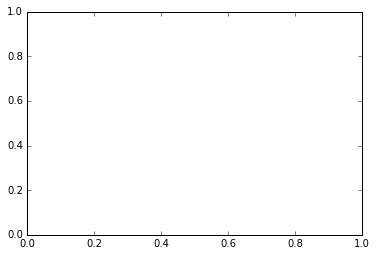

In [74]:
# Source: num_topics.py
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#MODELS_DIR = "/path/to/models/dir"
MAX_K = 10

#X = np.loadtxt(os.path.join(MODELS_DIR, "coords.csv"), delimiter="\t")
ks = range(1, MAX_K + 1)

inertias = np.zeros(MAX_K)
diff = np.zeros(MAX_K)
diff2 = np.zeros(MAX_K)
diff3 = np.zeros(MAX_K)
for k in ks:
    kmeans = KMeans(k).fit(tsnedata)
    inertias[k - 1] = kmeans.inertia_
    # first difference    
    if k > 1:
        diff[k - 1] = inertias[k - 1] - inertias[k - 2]
    # second difference
    if k > 2:
        diff2[k - 1] = diff[k - 1] - diff[k - 2]
    # third difference
    if k > 3:
        diff3[k - 1] = diff2[k - 1] - diff2[k - 2]

elbow = np.argmin(diff3[3:]) + 3
print(elbow)
plt.plot(range(0,50), inertias, "b*-")
plt.plot(ks[elbow], inertias[elbow], marker='o', markersize=12,
         markeredgewidth=2, markeredgecolor='r', markerfacecolor=None)
plt.ylabel("Inertia")
plt.xlabel("K")
plt.show()

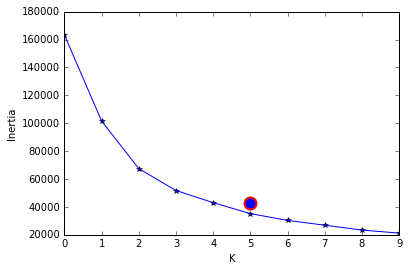

In [75]:
plt.plot(range(0,10), inertias, "b*-")
plt.plot(ks[elbow], inertias[elbow], marker='o', markersize=12,
         markeredgewidth=2, markeredgecolor='r', markerfacecolor=None)
plt.ylabel("Inertia")
plt.xlabel("K")
plt.show()

In [88]:
kmeans = KMeans(8).fit(tsnedata)
y = kmeans.labels_

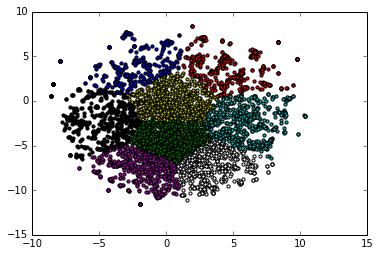

In [89]:
colors = ["b", "g", "r", "m", "c", "y", "k", "w"]
for i in range(tsnedata.shape[0]):
    plt.scatter(tsnedata[i,0],tsnedata[i,1], c=colors[y[i]], s=10)
plt.show()